In [1]:
import pandas as pd
import climateFunctions as clf
import matplotlib.pyplot as plt
import calendar
import importlib

In [2]:
importlib.reload(clf)
migration_dataset = "C:/Users/ashwi/Desktop/Ashwin/UCSD/Quarters/FA24/ECE143/project/dataset/migration/NABBP_2023_grp_03.csv"
world_shape = "C:/Users/ashwi/Desktop/Ashwin/UCSD/Quarters/FA24/ECE143/project/dataset/geodata/110m_cultural.zip"
species = 'Canada Goose'
species_id = [1723]
tracking_month = 9
year_range = [1960, 2023]
year_step = 5

In [3]:
df = pd.read_csv(migration_dataset)
month_migration = clf.getMonthLocationOverYears(df, species_id, tracking_month, year_range, year_step)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_32244\4257767073.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(migration_dataset)
c:\Users\ashwi\Desktop\Ashwin\UCSD\Quarters\FA24\ECE143\project\ECE143_cliMATE\python\climateFunctions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['MONTH_YEAR'] = pd.to_datetime(species_data['EVENT_YEAR'].astype(str) + '-' + species_data['EVENT_MONTH'].astype(str), errors='coerce')


In [4]:
yearly_centroids = clf.calcCentroidPerMonthYear(month_migration)

c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


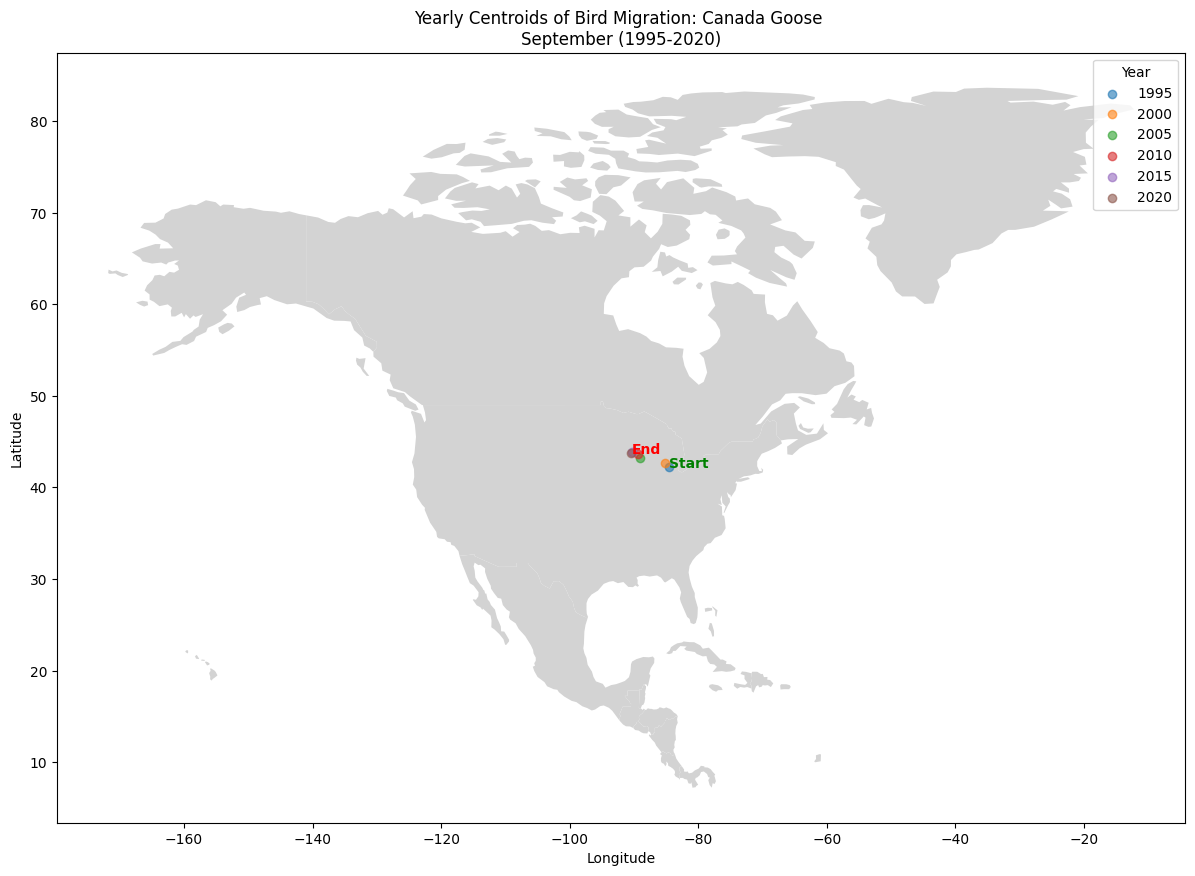

In [6]:
clf.plotYearlyCentroids(world_shape, species, yearly_centroids)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_32244\958309428.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


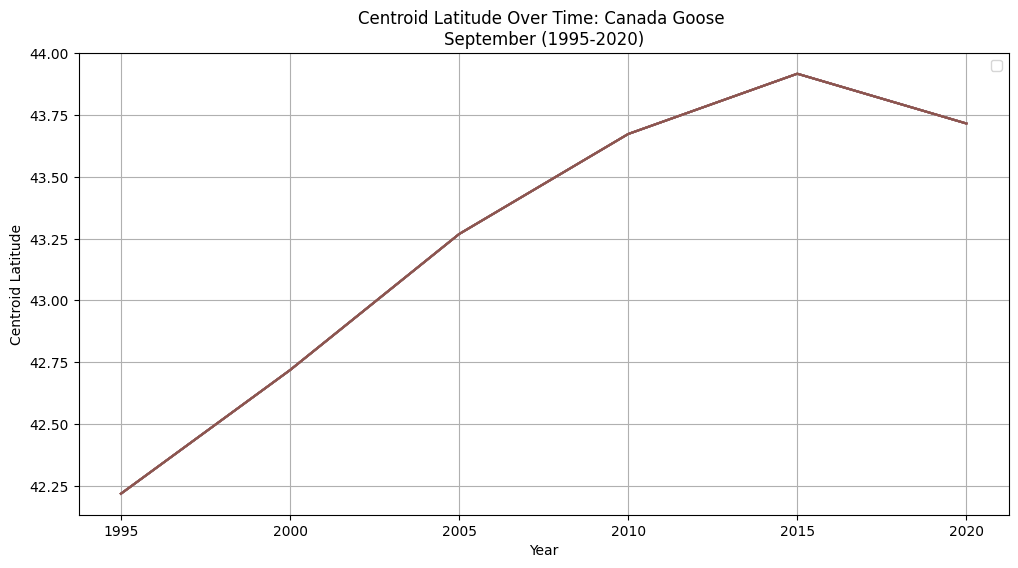

C:\Users\ashwi\AppData\Local\Temp\ipykernel_32244\958309428.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


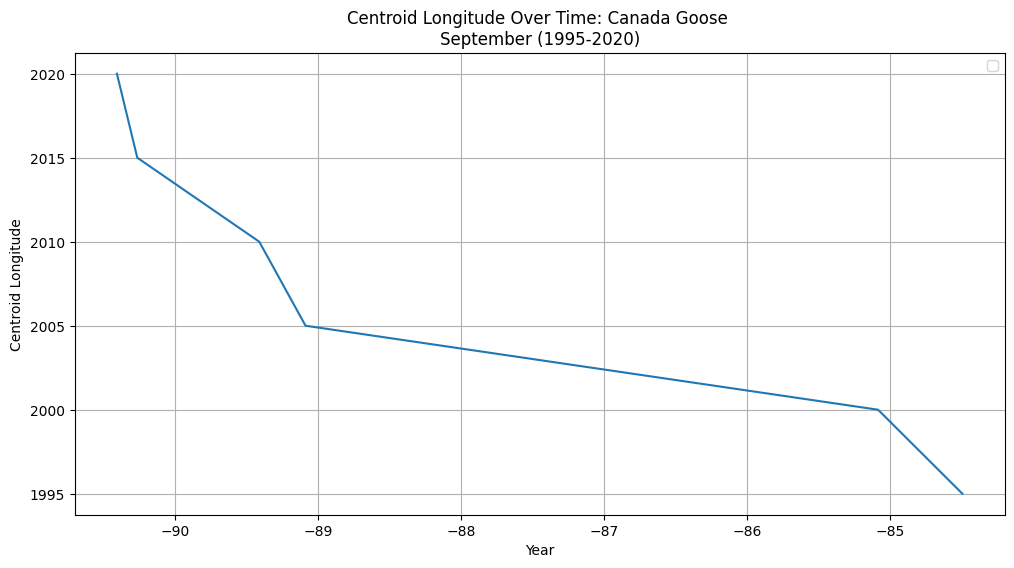

In [7]:
plt.figure(figsize=(12, 6))
for index, centroid in yearly_centroids.iterrows():
    plt.plot(yearly_centroids['EVENT_YEAR'], yearly_centroids['LAT_DD'])

plt.title(f"Centroid Latitude Over Time: {species} \n{calendar.month_name[int(yearly_centroids['EVENT_MONTH'][0])]} ({int(yearly_centroids['EVENT_YEAR'].min())}-{int(yearly_centroids['EVENT_YEAR'].max())})")
plt.xlabel('Year')
plt.ylabel('Centroid Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(yearly_centroids['LON_DD'], yearly_centroids['EVENT_YEAR'])

plt.title(f"Centroid Longitude Over Time: {species} \n{calendar.month_name[int(yearly_centroids['EVENT_MONTH'][0])]} ({int(yearly_centroids['EVENT_YEAR'].min())}-{int(yearly_centroids['EVENT_YEAR'].max())})")
plt.xlabel('Year')
plt.ylabel('Centroid Longitude')
plt.legend()
plt.grid(True)
plt.show()